<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.1/Chap1_2_2)_Multi_Variable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Ⅱ
-미국 보스턴 지역의 집값을 13개의 Feature를 이용하여 예측하는 모델을 만들어 보자

-샘플 개수 : 506개

-covariate : 14개 항목

In [1]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

## [1] Data
-Bostion Housing 데이터셋
-보스턴 지역의 주변 환경에 대한 수치값과 집값 데이터
- Sample수 : 506개
- Feature : 14개 

In [6]:
df_raw =pd.read_csv('C:\Users\HOME\Downloads\BostonHousing.csv') #csv(comma-separated values)파일 가져오기 

SyntaxError: ignored

In [ ]:
print(df_raw.shape) # Dataset의 크기 확인
df_raw

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df_raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# X값 coulumn
x = df_raw.drop(['medv'], axis=1)

# y값 column
y = df_raw['medv']

print(x.shape)
print(y.shape)

NameError: ignored

In [ ]:
#학습데이터와 테스트데이터를 일정비율로 나누기
#training/test=validation으로 나눔 -> overfitting되는지 확인하기 위함
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=1234)

#학습 데이터
print("x_train의 크기: ",x_train.shape)
print("y_train의 크기: ",y_train.shape,'\n')

#테스트 데이터 
print("x_test의 크기: ",x_test.shape)
print("y_test의 크기: ",y_test.shape)
print(type(y_train))

x_train의 크기:  (354, 13)
y_train의 크기:  (354,) 

x_test의 크기:  (152, 13)
y_test의 크기:  (152,)
<class 'pandas.core.series.Series'>


In [ ]:
#학습 데이터 Scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scale =  scaler.transform(x_train)  # x_train_scale은 numpy ndarray 


#테스트 데이터 Scaling
x_test_scale = scaler.transform(x_test)    # x_test_scale은 numpy ndarray 


# Array-->Tensor
x_train_tensor = torch.FloatTensor(x_train_scale)
y_train_tensor = torch.FloatTensor(y_train.values) #판다스 Series이므로 values를 사용해서 numpy ndarray로 가져오기

x_test_tensor = torch.FloatTensor(x_test_scale)
y_test_tensor = torch.FloatTensor(y_test.values)


In [ ]:
#학습 데이터 배치화 시키기 
#전체 데이터셋이 너무 클 때는 1 epoch로 사용하기에는 하드웨어에 부담이 되므로 batch로 쪼갬
#mini batch의 개수 = iteration = batch_size
train_data =  data_utils.TensorDataset(x_train_tensor, y_train_tensor)

dataloader =  data_utils.DataLoader(train_data, batch_size=100, shuffle= True, drop_last= True )
#shuffle을 통해 random하게 나눔
#drop_last를 통해 총 354개를 100개씩 batch로 나누고 남은 54개를 drop함

#배치화된 데이터 확인
for batch_idx, datas in enumerate(dataloader):
    
    print(batch_idx)
    print(datas[0].shape)  # x_train 
    print(datas[1].shape) # y_train
    break


0
torch.Size([100, 13])
torch.Size([100])


## [2] Model

In [ ]:
#Parameter 정의
input_size = 13
output_size = 1
learning_rate = 0.1
n_epochs = 200

In [ ]:
#model 생성
model = torch.nn.Linear(input_size, output_size)

In [ ]:
#손실함수 생성
criterion = torch.nn.MSELoss()
#Optimizer 생성
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

## [3]Training

In [ ]:
## Running the model
train_loss = []
test_loss = []

for epoch in range(n_epochs+1):
    
    for idx, (x_batch, y_batch) in enumerate(dataloader):
        #Batch 학습
        model.train()
        optimizer.zero_grad()
        
        y_pred = model(x_batch)
        y_pred = y_pred.reshape(-1)
        
        loss_train = criterion(y_pred, y_batch)
        
        loss_train.backward() #gradient 값 구함
        optimizer.step()

        
        #Validation
        #overfitting되는지 확인
        model.eval()
        y_test_pred = model(x_test_tensor)
        
        y_test_pred = y_test_pred.reshape(-1)
        
        loss_test = criterion(y_test_pred, y_test_tensor)
        
        
        
   
    train_loss.append(loss_train.item()) #epoch 수 만큼 append 됨
    test_loss.append(loss_test.item())
    print("epoch:{}, Loss_train:{:.2f}, Loss_test:{:.2f}".format( epoch, train_loss[-1], test_loss[-1]))

epoch:0, Loss_train:235.77, Loss_test:167.39
epoch:1, Loss_train:91.72, Loss_test:64.98
epoch:2, Loss_train:41.23, Loss_test:34.55
epoch:3, Loss_train:17.21, Loss_test:24.41
epoch:4, Loss_train:22.68, Loss_test:21.86
epoch:5, Loss_train:31.58, Loss_test:22.58
epoch:6, Loss_train:37.07, Loss_test:21.60
epoch:7, Loss_train:32.22, Loss_test:21.69
epoch:8, Loss_train:27.99, Loss_test:23.04
epoch:9, Loss_train:30.01, Loss_test:22.50
epoch:10, Loss_train:28.46, Loss_test:23.36
epoch:11, Loss_train:28.09, Loss_test:23.16
epoch:12, Loss_train:19.05, Loss_test:22.15
epoch:13, Loss_train:19.36, Loss_test:23.23
epoch:14, Loss_train:16.40, Loss_test:22.46
epoch:15, Loss_train:24.18, Loss_test:23.66
epoch:16, Loss_train:30.69, Loss_test:23.22
epoch:17, Loss_train:20.46, Loss_test:23.01
epoch:18, Loss_train:23.27, Loss_test:23.32
epoch:19, Loss_train:17.62, Loss_test:23.53
epoch:20, Loss_train:28.72, Loss_test:23.86
epoch:21, Loss_train:19.03, Loss_test:23.61
epoch:22, Loss_train:28.27, Loss_test:24

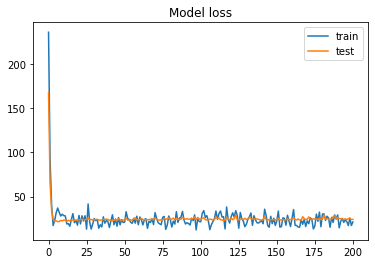

In [ ]:
# Loss 값 plot
# overfitting이 됐다면 train loss가 test loss와 달리 위에 있음

plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.title('Model loss')
plt.legend(loc= 'upper right')
plt.show()


### <Scaling>

### Tip) Scaling

- 정규분포를 사용하는 방식


$$ x_in = \frac{x_io - \mu_i}{\sigma_i} $$

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 8], [1, 8]]

scaler = StandardScaler()
scaler.fit(data)
data_arr= np.array(data)

print(data_arr.shape)
print(np.mean(data_arr, axis= 0))
data_arr.mean()

(4, 2)
[0.5 4. ]


2.25

In [ ]:
data_arr_scaler=scaler.transform(data_arr)
data_arr_scaler

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [ ]:
scaler.transform([[2, 2]])

array([[ 3. , -0.5]])

In [ ]:
print(data_arr_scaler)

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [ ]:
np.mean(data_arr_scaler, axis=0)

array([0., 0.])

In [ ]:
data_arr_scaler.mean()

0.0

In [ ]:
data_arr_scaler.std()

1.0